## Автокорреляция и стационарность

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import calendar

import matplotlib.pyplot as plt
%matplotlib inline

### Question 3

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову. Загрузите ряд и постройте его график. Какой из приведённых ниже графиков у вас получился?

In [2]:
milk = pd.read_csv('data/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


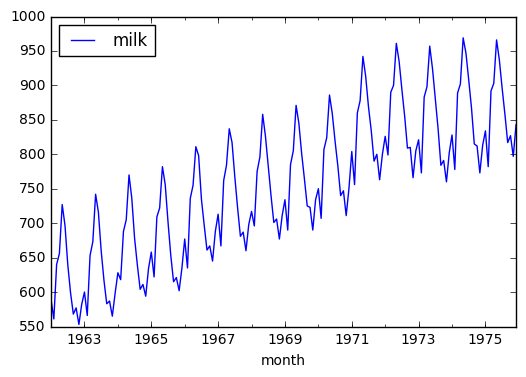

In [3]:
milk.plot()
plt.show()

### Question 4

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [4]:
sm.tsa.stattools.adfuller(milk.milk)

(-1.303811587422131,
 0.62742670860303096,
 13L,
 154L,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

### Question 5

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце позволяет функция monthrange из пакета calendar. Используйте её для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [5]:
milk['year'] = pd.DatetimeIndex(milk.index).year
milk['month'] = pd.DatetimeIndex(milk.index).month

In [6]:
milk.head()

,milk,year,month
month,,,
1962-01-01,589,1962,1
1962-02-01,561,1962,2
1962-03-01,640,1962,3
1962-04-01,656,1962,4
1962-05-01,727,1962,5


In [7]:
for month_id in milk.index:
    milk.loc[month_id, 'num_days'] = calendar.monthrange(month_id.year, month_id.month)[1]
    
milk['mean'] = milk['milk']/milk['num_days']

In [8]:
milk.head()

,milk,year,month,num_days,mean
month,,,,,
1962-01-01,589,1962,1,31.0,19.000000
1962-02-01,561,1962,2,28.0,20.035714
1962-03-01,640,1962,3,31.0,20.645161
1962-04-01,656,1962,4,30.0,21.866667
1962-05-01,727,1962,5,31.0,23.451613


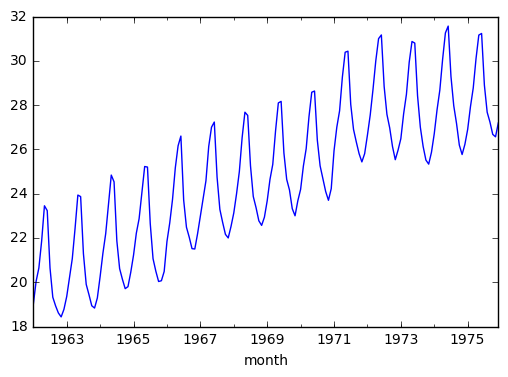

In [9]:
milk['mean'].plot()
plt.show()

In [10]:
milk['mean'].sum()

4166.326661899464